# Import Libraries

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import training
import torchvision
import model,utils
import load_data


## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.


# Creating training and test Data using Data Loaders

In [ ]:
train_loader,test_loader = load_data.cifar10_train_test_data()

100%|██████████| 170498071/170498071 [00:02<00:00, 80480870.36it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Data Visualization

let's have a look at some of the images the CIFAR10 data set

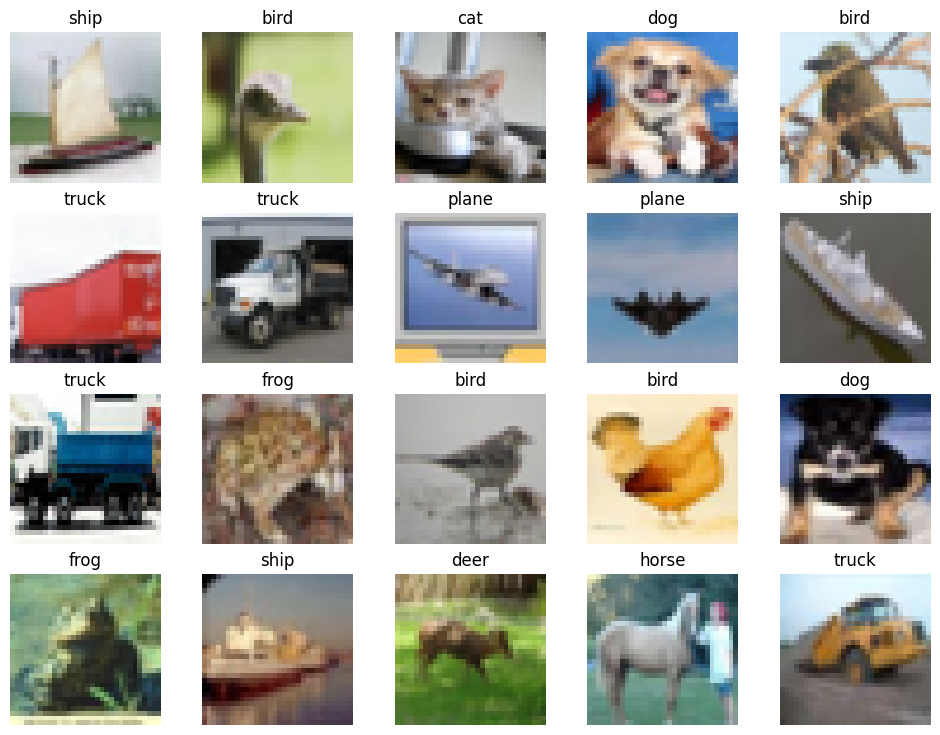

In [ ]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

cols = 5
rows = 4
fig, axs = plt.subplots(rows, cols, figsize=(12, 9))
counter= 0
rnd_idx = list(range(20))
for x in range(rows):
  for y in range(cols):
    axs[x, y].set_title(classes[labels[rnd_idx[counter]]])
    axs[x, y].imshow(utils.imshow_(images[counter]))
    axs[x, y].set_axis_off()
    counter+=1

plt.show()

# Loading our CNN Model and Summarizing the Params

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.NetBatch().to(device)
summary(model, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
         Dropout2d-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
         Dropout2d-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]              48
           Conv2d-10           [-1, 16, 32, 32]             512
      BatchNorm2d-11           [-1, 16, 32, 32]              32
        Dropout2d-12           [-1, 16, 32, 32]               0

# Let's Train and test our model

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
train_losses = []
train_acc = []
test_losses = []
test_acc = []
EPOCHS = 21
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss , train_accuracy = training.train(model, device, train_loader, optimizer, epoch)
    test_loss , test_accuracy = training.test(model, device, test_loader)
    train_losses.extend(train_loss),train_acc.extend(train_accuracy)
    test_losses.extend(test_loss),test_acc.extend(test_accuracy)

EPOCH: 0


Loss=1.3957834243774414 Batch_id=390 Accuracy=38.81: 100%|██████████| 391/391 [00:23<00:00, 16.31it/s]



Test set: Average loss: 1.3281, Accuracy: 5149/10000 (51.49%)

EPOCH: 1


Loss=1.1585317850112915 Batch_id=390 Accuracy=52.86: 100%|██████████| 391/391 [00:19<00:00, 20.47it/s]



Test set: Average loss: 1.0959, Accuracy: 6031/10000 (60.31%)

EPOCH: 2


Loss=1.247676134109497 Batch_id=390 Accuracy=58.33: 100%|██████████| 391/391 [00:17<00:00, 21.75it/s]



Test set: Average loss: 0.9807, Accuracy: 6449/10000 (64.49%)

EPOCH: 3


Loss=0.7518132925033569 Batch_id=390 Accuracy=61.58: 100%|██████████| 391/391 [00:18<00:00, 21.10it/s]



Test set: Average loss: 0.9277, Accuracy: 6650/10000 (66.50%)

EPOCH: 4


Loss=0.8926261067390442 Batch_id=390 Accuracy=64.27: 100%|██████████| 391/391 [00:18<00:00, 21.05it/s]



Test set: Average loss: 0.8853, Accuracy: 6834/10000 (68.34%)

EPOCH: 5


Loss=0.7639423608779907 Batch_id=390 Accuracy=66.02: 100%|██████████| 391/391 [00:19<00:00, 19.66it/s]



Test set: Average loss: 0.8476, Accuracy: 6995/10000 (69.95%)

EPOCH: 6


Loss=1.025510549545288 Batch_id=390 Accuracy=67.93: 100%|██████████| 391/391 [00:20<00:00, 19.24it/s]



Test set: Average loss: 0.8088, Accuracy: 7153/10000 (71.53%)

EPOCH: 7


Loss=0.9626607894897461 Batch_id=390 Accuracy=68.75: 100%|██████████| 391/391 [00:20<00:00, 18.86it/s]



Test set: Average loss: 0.7672, Accuracy: 7303/10000 (73.03%)

EPOCH: 8


Loss=0.7051271200180054 Batch_id=390 Accuracy=69.70: 100%|██████████| 391/391 [00:19<00:00, 20.19it/s]



Test set: Average loss: 0.7705, Accuracy: 7296/10000 (72.96%)

EPOCH: 9


Loss=1.007905125617981 Batch_id=390 Accuracy=70.52: 100%|██████████| 391/391 [00:19<00:00, 19.61it/s]



Test set: Average loss: 0.7339, Accuracy: 7436/10000 (74.36%)

EPOCH: 10


Loss=0.8252931833267212 Batch_id=390 Accuracy=70.98: 100%|██████████| 391/391 [00:20<00:00, 18.98it/s]



Test set: Average loss: 0.7575, Accuracy: 7355/10000 (73.55%)

EPOCH: 11


Loss=0.9015299677848816 Batch_id=390 Accuracy=71.75: 100%|██████████| 391/391 [00:19<00:00, 20.45it/s]



Test set: Average loss: 0.7095, Accuracy: 7554/10000 (75.54%)

EPOCH: 12


Loss=0.9592738151550293 Batch_id=390 Accuracy=72.00: 100%|██████████| 391/391 [00:19<00:00, 20.40it/s]



Test set: Average loss: 0.6997, Accuracy: 7582/10000 (75.82%)

EPOCH: 13


Loss=0.593557596206665 Batch_id=390 Accuracy=72.58: 100%|██████████| 391/391 [00:20<00:00, 19.15it/s]



Test set: Average loss: 0.6969, Accuracy: 7592/10000 (75.92%)

EPOCH: 14


Loss=0.7389734983444214 Batch_id=390 Accuracy=72.89: 100%|██████████| 391/391 [00:19<00:00, 20.27it/s]



Test set: Average loss: 0.6938, Accuracy: 7608/10000 (76.08%)

EPOCH: 15


Loss=0.8253700137138367 Batch_id=390 Accuracy=73.52: 100%|██████████| 391/391 [00:19<00:00, 19.88it/s]



Test set: Average loss: 0.6803, Accuracy: 7634/10000 (76.34%)

EPOCH: 16


Loss=0.7219278812408447 Batch_id=390 Accuracy=74.00: 100%|██████████| 391/391 [00:19<00:00, 19.74it/s]



Test set: Average loss: 0.6883, Accuracy: 7579/10000 (75.79%)

EPOCH: 17


Loss=0.7311628460884094 Batch_id=390 Accuracy=73.94: 100%|██████████| 391/391 [00:18<00:00, 21.40it/s]



Test set: Average loss: 0.6641, Accuracy: 7679/10000 (76.79%)

EPOCH: 18


Loss=0.8117109537124634 Batch_id=390 Accuracy=74.43: 100%|██████████| 391/391 [00:18<00:00, 21.58it/s]



Test set: Average loss: 0.6557, Accuracy: 7726/10000 (77.26%)

EPOCH: 19


Loss=0.5700355768203735 Batch_id=390 Accuracy=74.69: 100%|██████████| 391/391 [00:19<00:00, 20.54it/s]



Test set: Average loss: 0.6567, Accuracy: 7720/10000 (77.20%)

EPOCH: 20


Loss=0.7898769378662109 Batch_id=390 Accuracy=74.83: 100%|██████████| 391/391 [00:18<00:00, 21.66it/s]



Test set: Average loss: 0.6406, Accuracy: 7763/10000 (77.63%)



## Plotting the Training and Test Losses and accuracy

Text(0.5, 1.0, 'Test Accuracy')

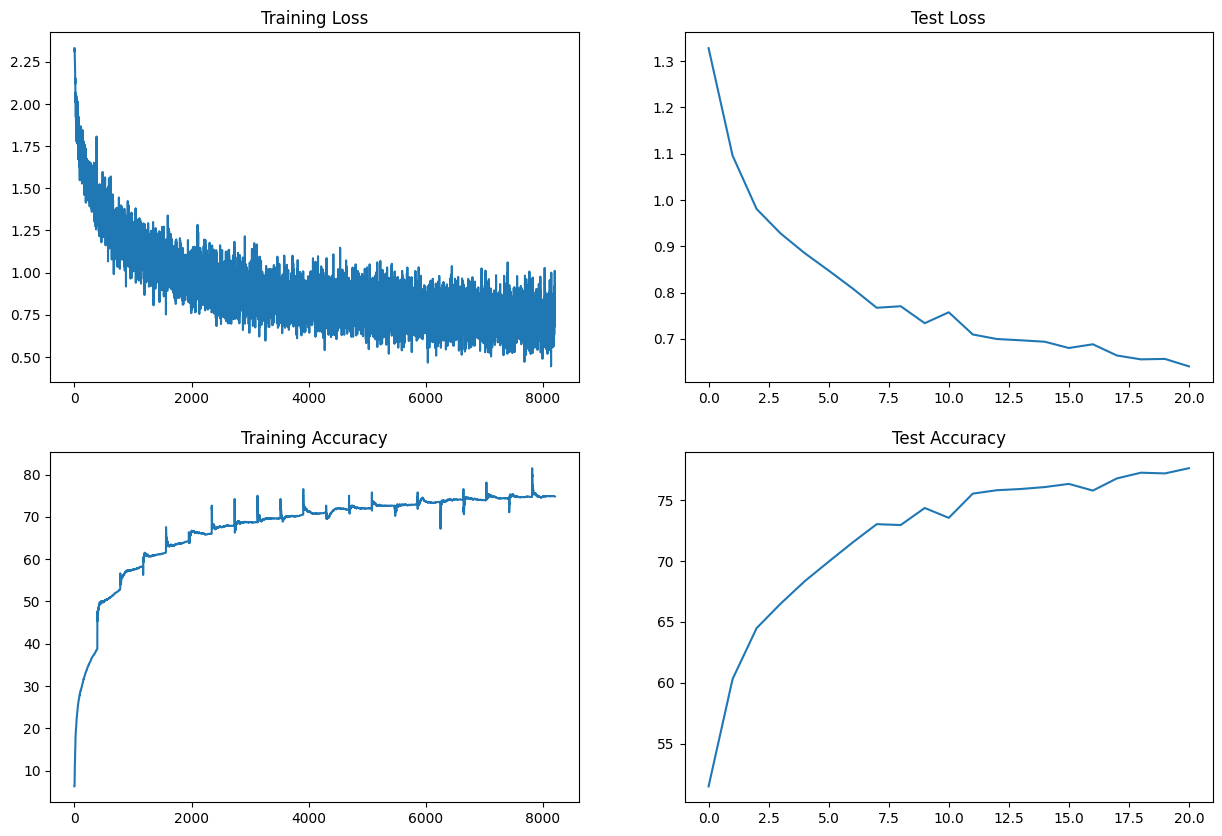

In [ ]:
t = [t_items.item() for t_items in train_losses]
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

### Missclassified Images

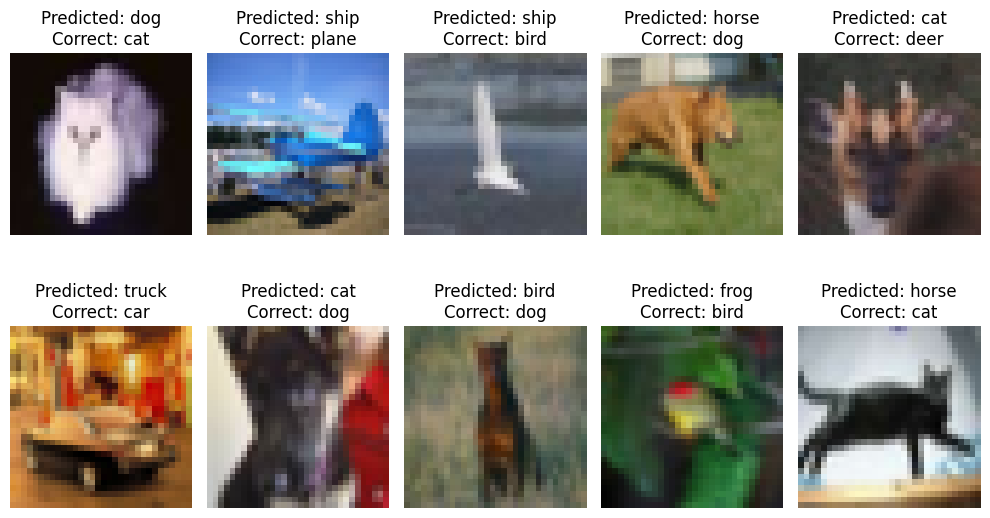

In [ ]:
utils.missclassified_plotting(model,device,test_loader)